In [74]:
import argparse
import gym
import os
import sys
import pickle
import time
sys.path.append(os.path.join(os.getcwd(), '..'))

import torch
from utils import *
from models.mlp_policy import Policy
from models.mlp_critic import Value
from models.mlp_policy_disc import DiscretePolicy
from core.ppo import ppo_step
from core.common import estimate_advantages
from core.agent import Agent

from larocs_sim.envs.drone_env import DroneEnv
import csv

import pandas as pd

In [41]:
np.set_printoptions(suppress=True)


In [8]:



dtype = torch.float64
torch.set_default_dtype(dtype)
device = torch.device('cpu')



try:
    env.shutdown()
except:
    pass
env = DroneEnv(random=False,seed=42, headless = True)


scene =  /home/gabriel/repos/my_larocs_sim/larocs_sim/envs/../../scenes/ardrone_modeled_headless.ttt
headless =  True
initial_position =  [0.0, 0.0, 1.7000000476837158]
initial_orientation =  [-0.0, 0.0, -0.0]
Initial Position of the Target =  [0.0, 8.419156038996789e-09, 1.7000000476837158]


/home/gabriel/anaconda3/envs/pyrep_raw/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [11]:
state = env.reset()

In [12]:
print(state)

[ 0.000000e+00 -4.209578e-09  0.000000e+00  1.000000e+00  0.000000e+00
  0.000000e+00 -0.000000e+00  1.000000e+00  0.000000e+00 -0.000000e+00
 -0.000000e+00  1.000000e+00 -0.000000e+00  0.000000e+00 -0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00]


In [39]:
state_dim = env.observation_space.shape[0]
running_state = ZFilter(shape = (state_dim,), demean=False, clip=5)

In [40]:
state = env.reset()
print(state)
for i in range(10):
    env._make_observation()
    prev_state=env.observation
    post_state = running_state(state)
    
    print('Prev_state = ', prev_state)
    print()
    
    print('POST = ', post_state)
    
    env.pr.step()
    print()
    print()    

[ 0. -0.  0.  1.  0.  0. -0.  1.  0. -0. -0.  1. -0.  0. -0.  0.  0.  0.]
Prev_state =  [ 0. -0.  0.  1.  0.  0. -0.  1.  0. -0. -0.  1. -0.  0. -0.  0.  0.  0.]

POST =  [ 0.         -0.29624933  0.          0.99999999  0.          0.
 -0.          0.99999999  0.         -0.         -0.          0.99999999
 -0.          0.         -0.          0.          0.          0.        ]


Prev_state =  [ 0.         -0.00000001 -0.0055182   1.         -0.00000003 -0.00000007
  0.00000003  1.          0.00000034  0.00000007 -0.00000034  1.
 -0.00000673 -0.00000131  0.0000006   0.0000001  -0.00000002 -0.22072792]

POST =  [ 0.        -0.4209578  0.         5.         0.         0.
 -0.         5.         0.        -0.        -0.         5.
 -0.         0.        -0.         0.         0.         0.       ]


Prev_state =  [ 0.         -0.00000001 -0.02329886  1.         -0.00000005  0.00000007
  0.00000005  1.          0.00000048 -0.00000007 -0.00000048  1.
 -0.00000278  0.00000279  0.00000038  

# Plotando histogramas

In [43]:
state_dim = env.observation_space.shape[0]
is_disc_action = len(env.action_space.shape) == 0
running_state = ZFilter((state_dim,), clip=5)
# running_reward = ZFilter((1,), demean=False, clip=10)
"""seeding"""
np.random.seed(42)
torch.manual_seed(42)
# env.seed(args.seed)

In [45]:
file='/home/gabriel/repos/PyTorch-RL/checkpoint/name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL/GAIL_Testing_norm_stochastic_itr_99.p'

try:
    policy_net, value_net, discrim_net, running_state = pickle.load(open(file, "rb"))
    print('1')
except:
    policy_net, value_net,  running_state = pickle.load(open(file, "rb"))
    print('2')

1


In [47]:
print('type running state = ',type(running_state))

# env.shutdown();import sys;sys.exit(0)
print
policy_net.to(device)
value_net.to(device)

type running state =  <class 'utils.zfilter.ZFilter'>


Value(
  (affine_layers): ModuleList(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
  )
  (value_head): Linear(in_features=128, out_features=1, bias=True)
)

# Histogramas

## running_state_novo 

In [83]:
"""create agent"""
running_state = ZFilter((state_dim,), clip=5)
agent = Agent(env, policy_net, device, running_state=running_state, num_threads=1, mean_action=True)

max_timesteps=2000
batch, log = agent.collect_samples(max_timesteps)

print('R_min {0:.2f}\tR_max {1:.2f}\tR_avg {2:.2f}\tNum_episodes {3:.2f}'.format(log['min_reward'], log['max_reward'], log['avg_reward'], log['num_episodes']))

R_min 118.54	R_max 507.05	R_avg 161.73	Num_episodes 26.00


## loaded state_novo

In [85]:
"""create agent"""
file='/home/gabriel/repos/PyTorch-RL/checkpoint/name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL/GAIL_Testing_norm_stochastic_itr_99.p'

try:
    policy_net, value_net, discrim_net, running_state = pickle.load(open(file, "rb"))
    print('1')
except:
    policy_net, value_net,  running_state = pickle.load(open(file, "rb"))
    print('2')
    
    
agent = Agent(env, policy_net, device, running_state=running_state, num_threads=1, mean_action=True)

max_timesteps=2000
batch, log = agent.collect_samples(max_timesteps)

print('R_min {0:.2f}\tR_max {1:.2f}\tR_avg {2:.2f}\tNum_episodes {3:.2f}'.format(log['min_reward'], log['max_reward'], log['avg_reward'], log['num_episodes']))

1
R_min 709.02	R_max 769.74	R_avg 736.24	Num_episodes 8.00


## actions

In [67]:
df_actions = pd.DataFrame(np.array(batch.action))

In [68]:
display(df_actions.describe())

,0,1,2,3
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.266972,0.143623,0.037041,0.041852
std,0.759539,1.041920,1.188686,1.080461
min,-1.245985,-1.959714,-2.431567,-2.643105
25%,-0.374269,-0.771763,-0.999347,-0.838263
50%,0.212630,0.129279,0.038019,0.134691
75%,0.880281,0.972092,0.990022,0.927241
max,1.984974,2.565782,3.197584,2.360401


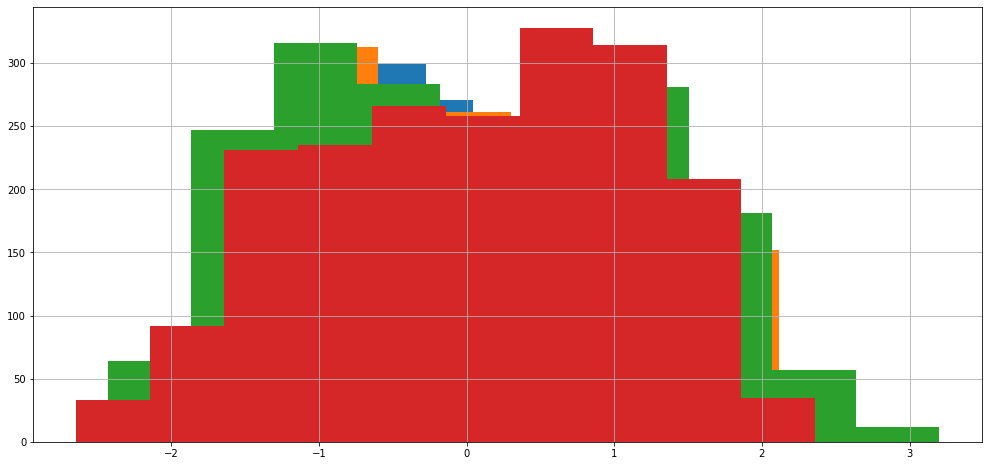

In [70]:
for column in df_actions.columns:
    df_actions[column].hist(figsize=(17,8))

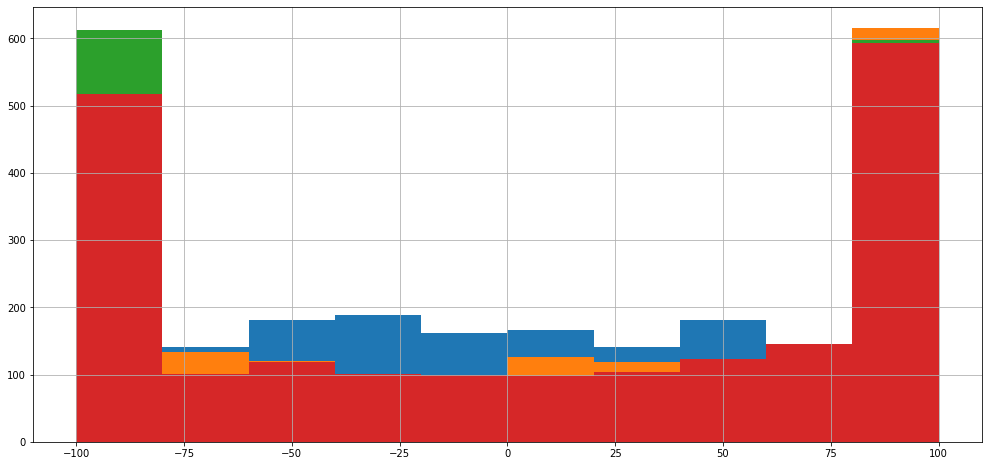

In [73]:
def f(x):
    x = np.clip(x*100,a_min=-100, a_max=100)
    return x


df_actions_ = df_actions.apply(f, axis=1)
for column in df_actions.columns:
    df_actions_[column].hist(figsize=(17,8))

## states

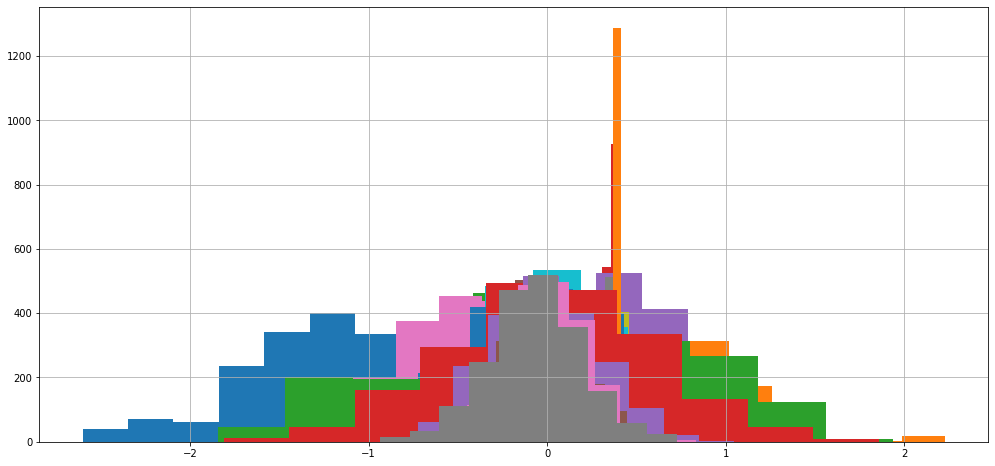

In [80]:
df_states = pd.DataFrame(np.array(batch.state))

for column in df_states.columns:
    df_states[column].hist(figsize=(17,8))

## rewards

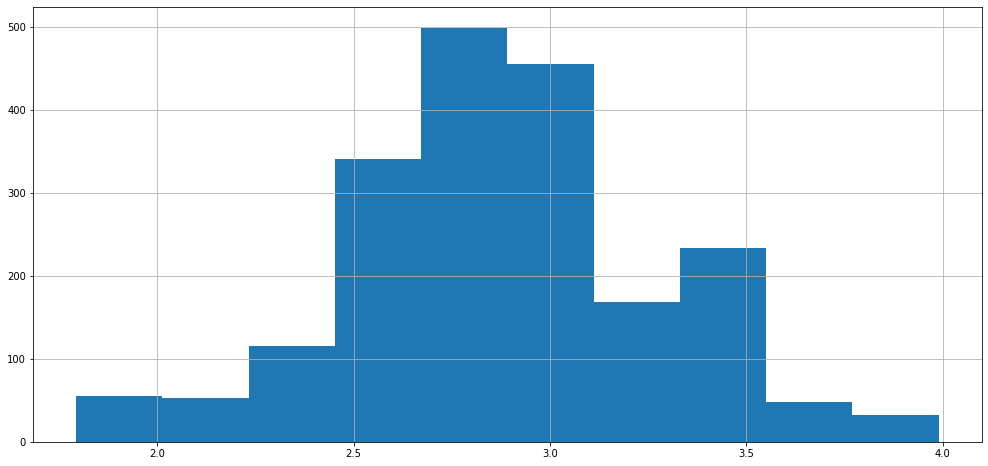

In [79]:
df_rewards = pd.DataFrame(np.array(batch.reward))

for column in df_rewards.columns:
    df_rewards[column].hist(figsize=(17,8))

In [108]:
df_rewards_norm = df_rewards.copy()

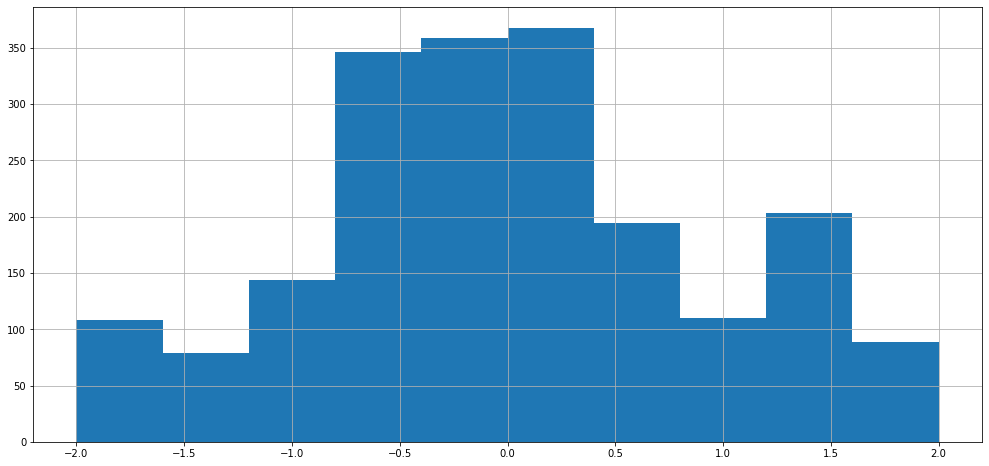

In [109]:
reward_mean=True
std=True
clip=2

if reward_mean:
    df_rewards_norm = df_rewards_norm.apply(lambda x : x - x.mean())    
if std:
    df_rewards_norm = df_rewards_norm.apply(lambda x : x/(x.std() +1e-8))    
if clip:
    df_rewards_norm = df_rewards_norm.clip(lower=-clip, upper = + clip)



for column in df_rewards.columns:
    df_rewards_norm[column].hist(figsize=(17,8))

# Close

In [ ]:
env.shutdown()